In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import joblib



IMPORT DATA WITH PD


In [3]:

chdata = pd.read_csv('/Users/floatnarue/Desktop/Get to acheivement stuff/DL:NLP stuff/Altotech/chiller_plant_data.csv',index_col= False)
cinfo = pd.read_csv('/Users/floatnarue/Desktop/Get to acheivement stuff/DL:NLP stuff/Altotech/columns_info.csv')
chdata_withtime = chdata.copy()
chdata.drop('datetime',axis=1,inplace=True)



In [4]:
np.shape(chdata)
cor = chdata.corr("pearson")

In [5]:
plt.figure(figsize=(100,90))
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [6]:
cor_target = abs(cor["plant_efficiency"])
rel_feature = cor_target[cor_target>=0.3]
rel_feature.shape,rel_feature



((10,),
 plant_efficiency    1.000000
 building_load       0.381803
 rh                  0.342919
 chw_flow            0.345775
 cdw_flow            0.321277
 ct2_speed           0.329510
 ct3_speed           0.318177
 ct4_speed           0.345886
 ct2_power           0.310042
 ct3_power           0.307143
 Name: plant_efficiency, dtype: float64)

(38348, 9) (38348,)


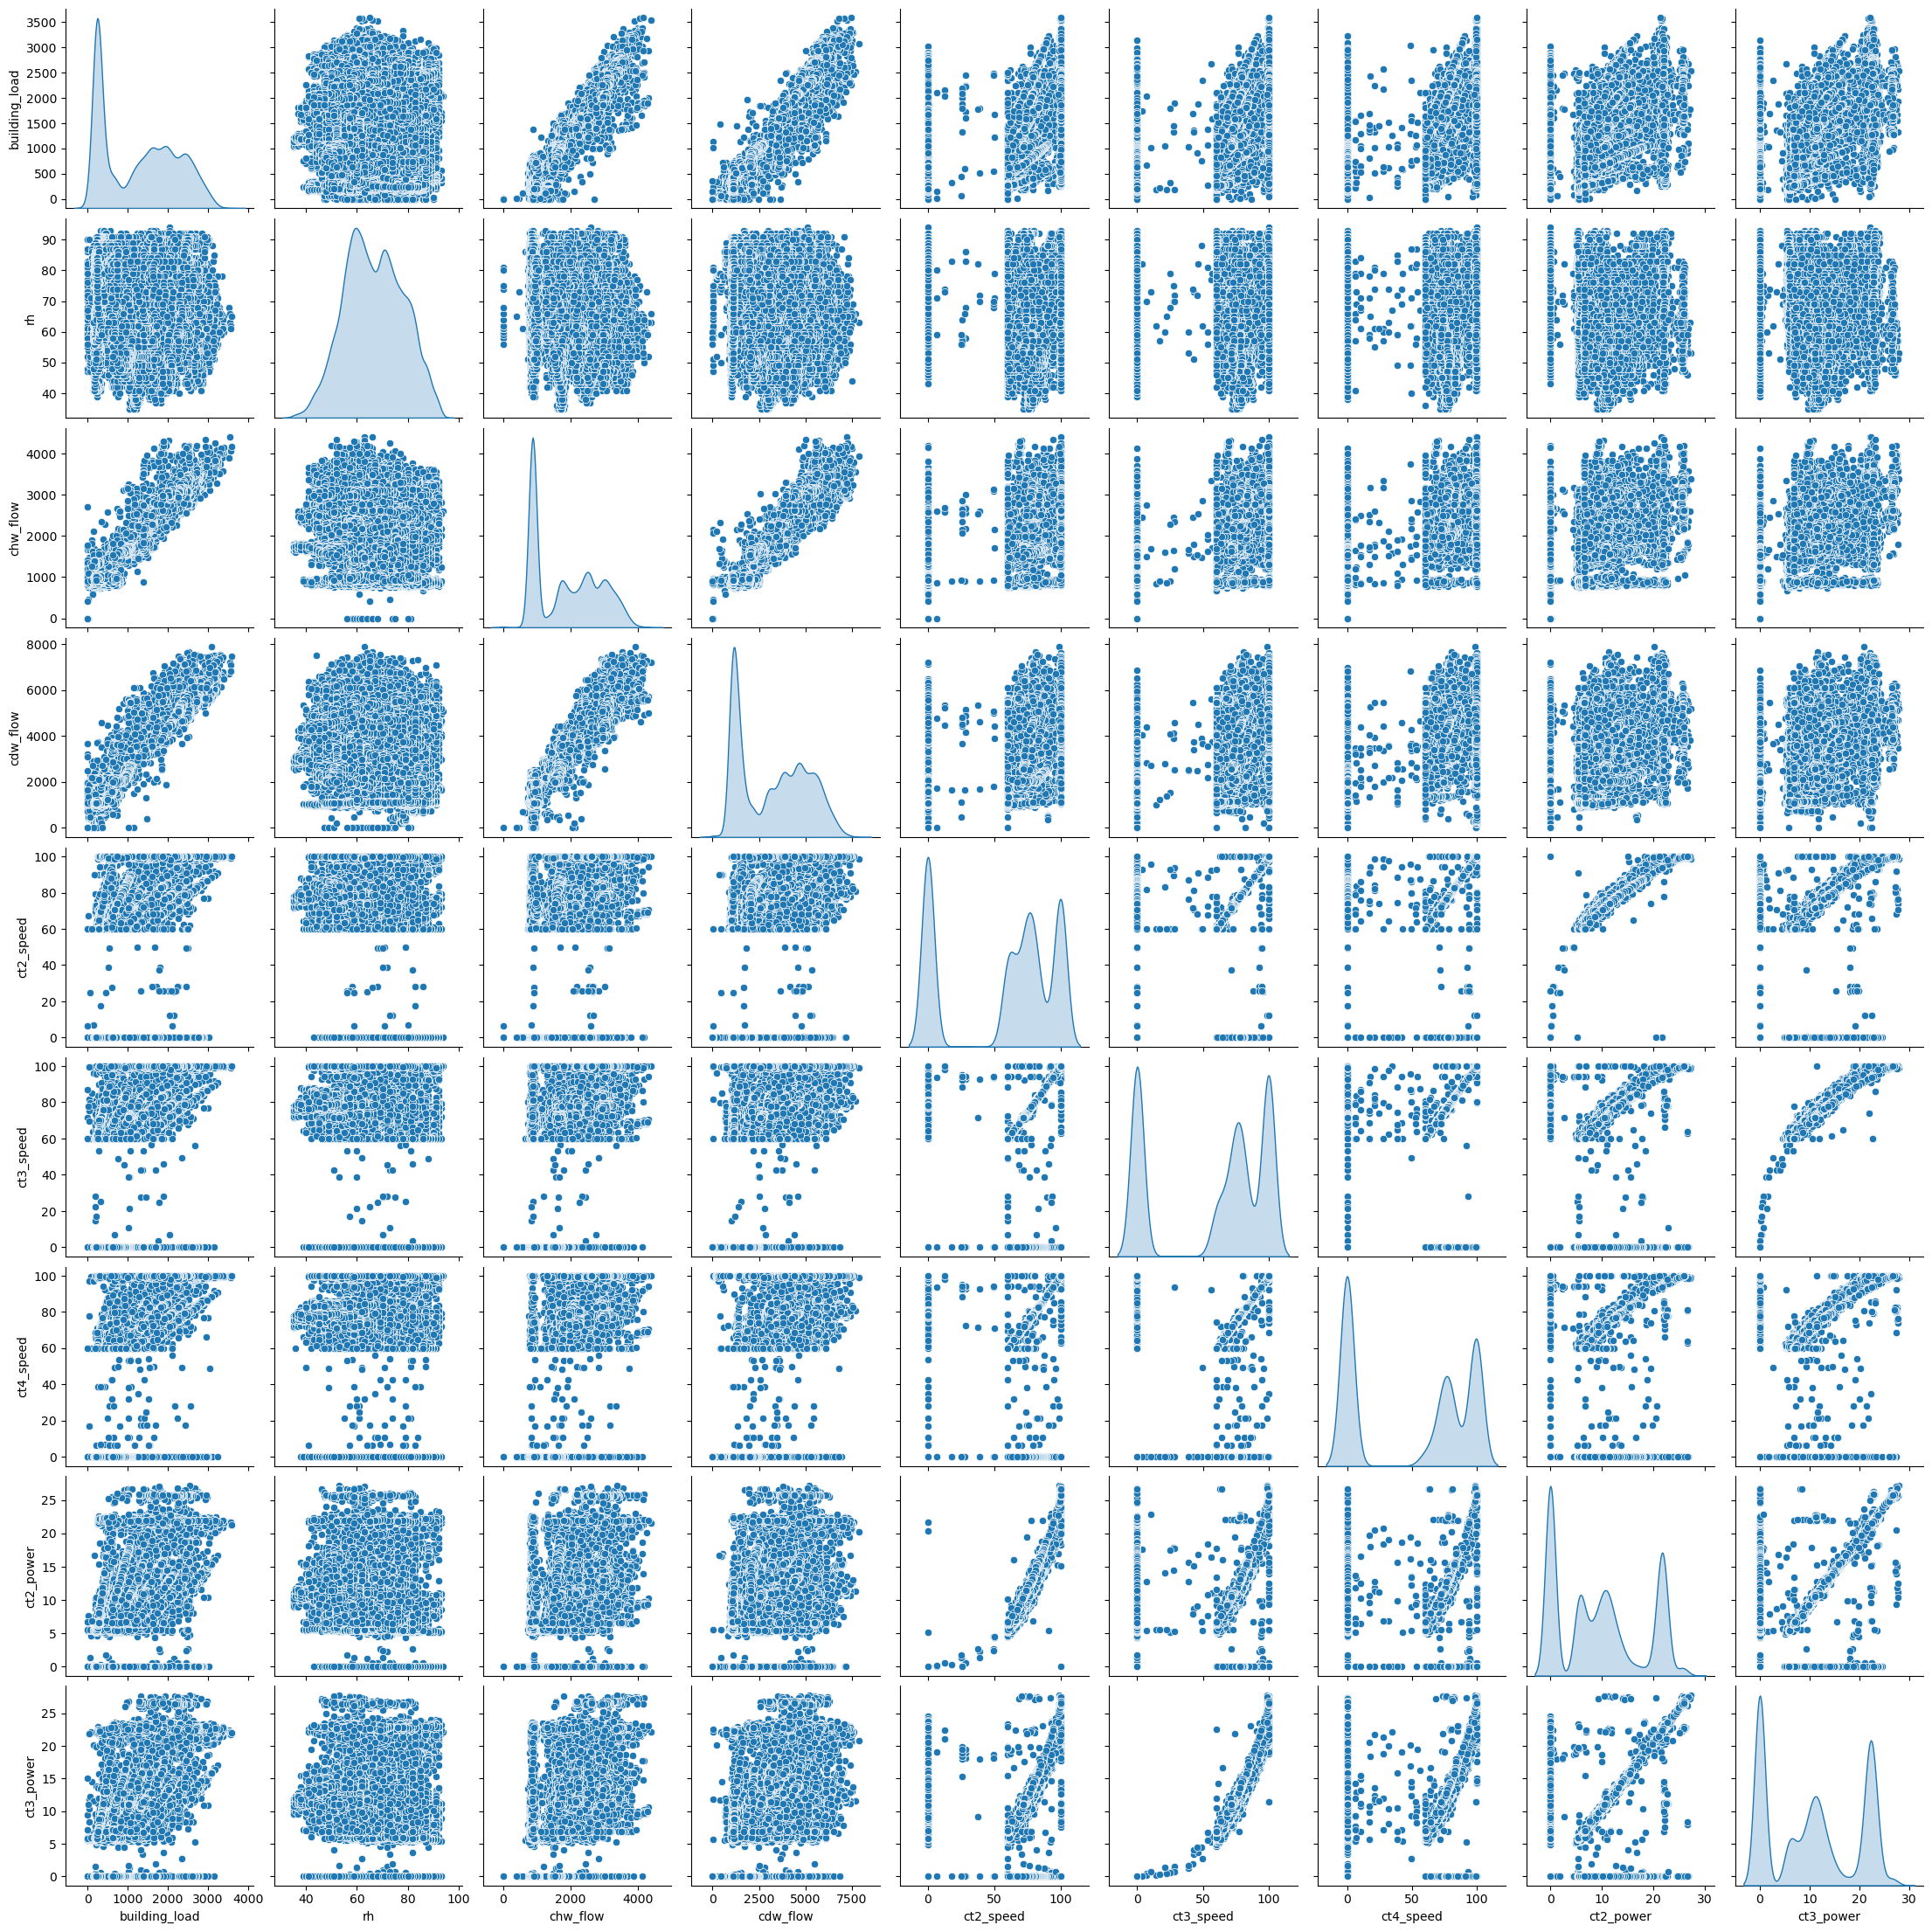

In [7]:
x = chdata.drop(["plant_efficiency"],axis= 1 )
column_name = []
for col in chdata.columns:
    if col in rel_feature :
        column_name.append(col)
column_name.remove("plant_efficiency")
x = x[column_name]
y = chdata["plant_efficiency"]
sns.pairplot(chdata[column_name], diag_kind='kde')
print(x.shape,y.shape)




Feature engineering

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
x_scale = scaler.transform(x)

x_scale

print(x_scale.shape , x_scale.shape)

(38348, 9) (38348, 9)


Using train test spliting but set the shuffle option to False !! 

So if we use TimeSeriessplit ?


In [9]:
## Create function for RMSE
def root_mean_squared_error(y, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y)))

    

MLP algorithm

Learning rate before first fit: 0.01
Epoch 1/200
360/360 [==============================] - 1s 2ms/step - loss: 8.8022 - root_mean_squared_error: 2.3500 - val_loss: 1.1587 - val_root_mean_squared_error: 0.9842
Epoch 2/200
360/360 [==============================] - 0s 1ms/step - loss: 1.0447 - root_mean_squared_error: 1.0076 - val_loss: 0.5391 - val_root_mean_squared_error: 0.6411
Epoch 3/200
360/360 [==============================] - 0s 1ms/step - loss: 0.5540 - root_mean_squared_error: 0.7356 - val_loss: 0.3061 - val_root_mean_squared_error: 0.4780
Epoch 4/200
360/360 [==============================] - 0s 1ms/step - loss: 0.3666 - root_mean_squared_error: 0.5978 - val_loss: 0.2114 - val_root_mean_squared_error: 0.3900
Epoch 5/200
360/360 [==============================] - 0s 1ms/step - loss: 0.2497 - root_mean_squared_error: 0.4936 - val_loss: 0.1547 - val_root_mean_squared_error: 0.3302
Epoch 6/200
360/360 [==============================] - 0s 1ms/step - loss: 0.2061 - root_mean_squa

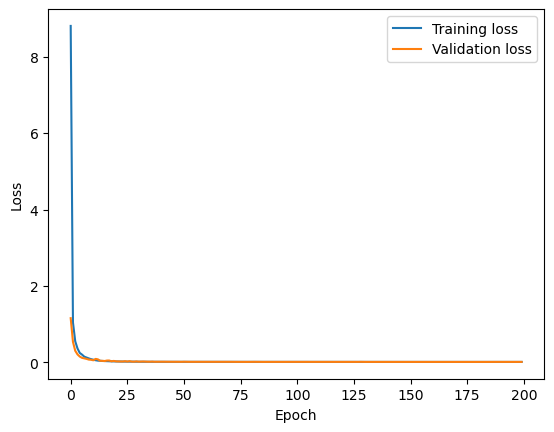

480/480 [==============================] - 0s 590us/step


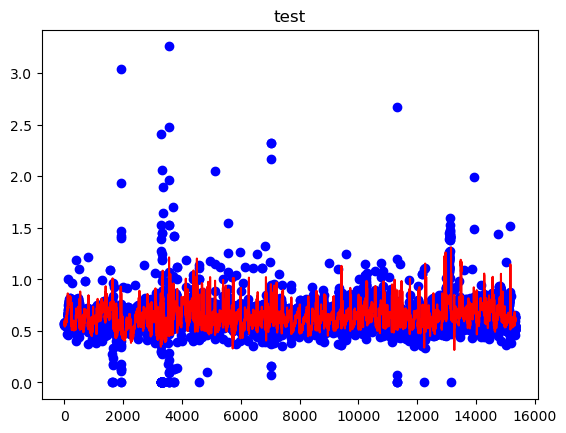

ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.

In [10]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0,shuffle=False)
initial_learning_rate = 0.01
epoch = 200

model = Sequential(
    [
        # Dense(units = 12,kernel_initializer='random_normal',bias_initializer='zeros', activation='relu', name="layer1"), 
        Dense(units = 8,kernel_initializer='random_normal',bias_initializer='zeros', activation = 'relu', name = 'layer2'),
        Dense(units =1,kernel_initializer='random_normal',bias_initializer='zeros',activation= 'linear' , name="outputlayer")
        
    ]
)

model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=initial_learning_rate,decay =0.01,clipvalue = 1.0),metrics=[root_mean_squared_error])



print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epoch,batch_size=64)#,callbacks=[keras.callbacks.EarlyStopping(patience=10)])
print(history.history.keys())
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())


# Evaluate the model using RMSE as the metric
eval_result = model.evaluate(x_test, y_test, verbose=0)

# Print the RMSE value


print("Root Mean Squared Error (RMSE):", np.sqrt(eval_result[0]))
# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




y_pred = model.predict(x_test)
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.plot(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


plotGraph(y_test, y_pred, "test")



model.save("chiller-model.h5")

In [13]:
tf.saved_model.save(model, '/Users/floatnarue/Desktop/Get to acheivement stuff/DL:NLP stuff/Altotech')


INFO:tensorflow:Assets written to: /Users/floatnarue/Desktop/Get to acheivement stuff/DL:NLP stuff/Altotech/assets


Linear regression

root mean square errors(RMSE) = 0.13225190611310841


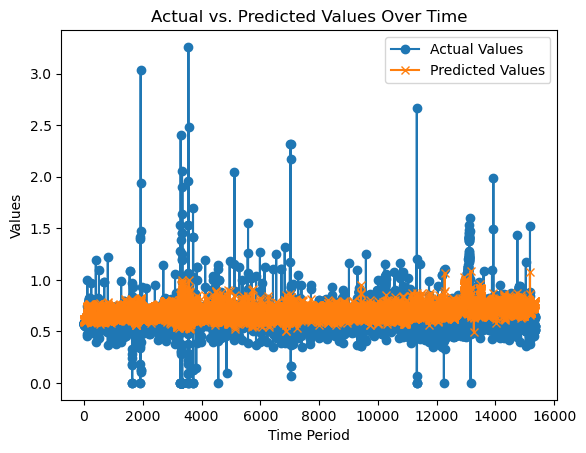

In [48]:
from sklearn.linear_model import LinearRegression

Linear = LinearRegression()
Linear.fit(x_train,y_train)

y_pred = Linear.predict(x_test)


# calculate MSE
import math
import sklearn
from sklearn.metrics import accuracy_score
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print("root mean square errors(RMSE) = "+ str(math.sqrt(mse)))


plt.plot(range(len(y_test)), y_test, label="Actual Values", marker='o')
plt.plot(range(len(y_test)), y_pred, label="Predicted Values", marker='x')
plt.xlabel("Time Period")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values Over Time")
plt.legend()
plt.show()





In [53]:

import joblib
joblib.dump(Linear, 'linear_regression_model.pkl')

print("Model saved successfully.")

Model saved successfully.
